In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Brand Sales data Analysis

In [2]:
data = pd.read_excel("Brand Sales Mar 2019.xlsx");

In [3]:
data.head(15)

,brand,category,Total Sales,PY Total Sales
0,JUICY,Fragrances,$124859906358.14,$73863165793.54
1,ARDEN,Skincare,$105053644250.29,$66188353545.48
2,ARDEN,Cosmetics,$57928720702.78,$36868004018.75
3,ARDEN,Fragrances,$34529425545.60,$20430182770.07
4,VARVATOS,Fragrances,$21898736776.07,$12188729486.63
5,TAYLOR,Fragrances,$16699229414.57,$10267437541.51
6,BRITNEY,Fragrances,$14963469178.05,$9945186927.40
7,NaN,Skin Care,$11592865347.00,$5794989473.00
8,S MENDES,Fragrances,$6220640684.82,$5253409091.71
9,ED HARDY,Fragrances,$4594533491.89,$3103487501.16


In [4]:
data.dtypes

brand             object
category          object
Total Sales       object
PY Total Sales    object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           3854 non-null   object
 1   category        3857 non-null   object
 2   Total Sales     3857 non-null   object
 3   PY Total Sales  3310 non-null   object
dtypes: object(4)
memory usage: 120.7+ KB


In [6]:
data.shape

(3857, 4)

In [7]:
data.describe()

,brand,category,Total Sales,PY Total Sales
count,3854,3857,3857,3310
unique,3143,17,3782,3233
top,REVLON,Hair Care,$2.00,$0.00
freq,9,1150,10,60


In [8]:
data.brand.unique()

array(['JUICY', 'ARDEN', 'VARVATOS', ..., 'FLIRT!', 'MICHAEL KORS BEAUTY',
       'BEAUTY BIOSCIENCE'], dtype=object)

In [9]:
data[data.brand=="REVLON"].groupby("category")["Total Sales"].sum().sort_values(ascending=False)

category
Hair Care                   $9700751.69
Fragrances                   $833455.15
Cosmetic Applications       $7886376.79
Skin Care                   $7718307.40
Multi Seg Product                $51.00
Beauty tools              $475230564.00
Nail Treatments             $1824845.85
Color Cosmetics          $1401445187.00
Nail Polish Remover              $11.60
Name: Total Sales, dtype: object

In [10]:
data[data.brand.isnull()]

,brand,category,Total Sales,PY Total Sales
7,NaN,Skin Care,$11592865347.00,$5794989473.00
30,NaN,Hair Care,$1452731491.00,$679691836.00
357,NaN,Hair Color,$27423583.00,$12664670.00


In [11]:
data[data["PY Total Sales"].isnull()]

,brand,category,Total Sales,PY Total Sales
402,DERMASUCTION,Skin Care,$20580946.73,NaN
767,CAKE,Hair Care,$3771399.37,NaN
770,L'OREAL REVITALIFT DERM INTENSIVES,Skin Care,$3635075.34,NaN
804,NOT YOUR MOTHER'S CURL TALK,Hair Care,$3142721.67,NaN
841,IRISH SPRING,Hair Care,$2673373.63,NaN
...,...,...,...,...
3841,TRIM,Hand/Arm Lotion,$0.50,NaN
3843,DIVA COUTURE,Hand/Arm Lotion,$0.05,NaN
3844,DAGGETT & RAMSDELL,Nail Treatments,$0.01,NaN
3845,MODEL SECRETS,Skin Care,$0.01,NaN


In [12]:
data.brand.sample(n=10)
##1883 TENOVERTEN + -3398     2019-07-24 00:00:00

2132          DIABETIC DEFENSE
1541              JUST BECAUSE
1610               KINKY-CURLY
2304                    AMENTA
1407                   H CANDY
2757    DEAD SEA MAGIC MINERAL
3121    SOAP & GLORY COSMETICS
1605                 HOLLYWOOD
3171                  BABY SPA
2312           KATE SOMERVILLE
Name: brand, dtype: object

In [13]:
isinstance(data.loc[10]["brand"],datetime)

False

In [14]:
data.shape

(3857, 4)

In [15]:
for i in range(len(data["brand"])):
    if type(data.loc[i]["brand"])==datetime:
        data.drop(index=i,inplace=True)
data.shape

(3856, 4)

In [16]:
data.category.unique()

array(['Fragrances', 'Skincare', 'Cosmetics', 'Skin Care',
       'Color Cosmetics', 'Apdeo', 'Hair Care', 'MAKEUP',
       'Make up Removers', 'Hair Color', 'Beauty tools',
       'Cosmetic Applications', 'Nail Polish Remover', 'Nail Treatments',
       'Hand/Arm Lotion', 'Foot Care', 'Multi Seg Product'], dtype=object)

In [17]:
data.category.value_counts().sort_values()

Cosmetics                   1
Skincare                    1
Multi Seg Product           5
Make up Removers           24
Color Cosmetics            27
Apdeo                      34
Beauty tools               37
Hair Color                 65
Nail Polish Remover        86
Foot Care                 111
Nail Treatments           124
Cosmetic Applications     158
MAKEUP                    293
Hand/Arm Lotion           308
Fragrances                538
Skin Care                 894
Hair Care                1150
Name: category, dtype: int64

In [18]:
data.head(5)

,brand,category,Total Sales,PY Total Sales
0,JUICY,Fragrances,$124859906358.14,$73863165793.54
1,ARDEN,Skincare,$105053644250.29,$66188353545.48
2,ARDEN,Cosmetics,$57928720702.78,$36868004018.75
3,ARDEN,Fragrances,$34529425545.60,$20430182770.07
4,VARVATOS,Fragrances,$21898736776.07,$12188729486.63


In [19]:
data["Total Sales"].str.split("$")[3852][1].split(")")[0]

'22.00'

In [20]:
data["Total Sales"]=data["Total Sales"].str.split("$").apply(lambda x:float(x[1]) if x[1][-1]!=")" else float(x[1].split(")")[0]))

In [21]:
data.head(10)

,brand,category,Total Sales,PY Total Sales
0,JUICY,Fragrances,1.248599e+11,$73863165793.54
1,ARDEN,Skincare,1.050536e+11,$66188353545.48
2,ARDEN,Cosmetics,5.792872e+10,$36868004018.75
3,ARDEN,Fragrances,3.452943e+10,$20430182770.07
4,VARVATOS,Fragrances,2.189874e+10,$12188729486.63
5,TAYLOR,Fragrances,1.669923e+10,$10267437541.51
6,BRITNEY,Fragrances,1.496347e+10,$9945186927.40
7,NaN,Skin Care,1.159287e+10,$5794989473.00
8,S MENDES,Fragrances,6.220641e+09,$5253409091.71
9,ED HARDY,Fragrances,4.594533e+09,$3103487501.16


In [22]:
data.describe()

,Total Sales
count,3.856000e+03
mean,1.380109e+08
std,2.900991e+09
min,0.000000e+00
25%,2.094915e+03
50%,6.535812e+04
75%,1.599850e+06
max,1.248599e+11


In [23]:
data["PY Total Sales"].fillna("$0.00",inplace=True)

In [24]:
data["PY Total Sales"]=data["PY Total Sales"].str.split("$").apply(lambda x:float(x[1]) if x[1][-1]!=")" else float(x[1].split(")")[0]))

In [25]:
data["PY Total Sales"]

0       7.386317e+10
1       6.618835e+10
2       3.686800e+10
3       2.043018e+10
4       1.218873e+10
            ...     
3852    6.200000e+01
3853    2.300000e+01
3854    0.000000e+00
3855    2.900000e+01
3856    3.600000e+01
Name: PY Total Sales, Length: 3856, dtype: float64

In [26]:
data.head()

,brand,category,Total Sales,PY Total Sales
0,JUICY,Fragrances,1.248599e+11,7.386317e+10
1,ARDEN,Skincare,1.050536e+11,6.618835e+10
2,ARDEN,Cosmetics,5.792872e+10,3.686800e+10
3,ARDEN,Fragrances,3.452943e+10,2.043018e+10
4,VARVATOS,Fragrances,2.189874e+10,1.218873e+10


In [27]:
data.describe()

,Total Sales,PY Total Sales
count,3.856000e+03,3.856000e+03
mean,1.380109e+08,8.553973e+07
std,2.900991e+09,1.770508e+09
min,0.000000e+00,0.000000e+00
25%,2.094915e+03,2.701950e+02
50%,6.535812e+04,2.670700e+04
75%,1.599850e+06,8.848223e+05
max,1.248599e+11,7.386317e+10


# Brand wise Data Analysis
### Total sales in each brand including all the category - descending order 

In [28]:
currentyear_brand_sales = data.groupby("brand")["Total Sales"].sum().sort_values(ascending=False) 
currentyear_brand_sales.head(10)

brand
ARDEN       1.975118e+11
JUICY       1.248599e+11
VARVATOS    2.189874e+10
TAYLOR      1.669923e+10
BRITNEY     1.496347e+10
S MENDES    6.220641e+09
L'OREAL     5.008827e+09
ED HARDY    4.594533e+09
N MINAJ     3.777394e+09
DOVE        3.637461e+09
Name: Total Sales, dtype: float64

<Figure size 576x576 with 0 Axes>

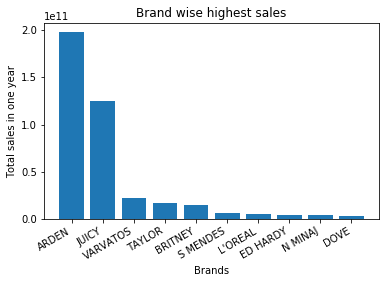

<Figure size 576x576 with 0 Axes>

In [29]:
plt.bar(np.array(currentyear_brand_sales.head(10).index),np.array(currentyear_brand_sales.head(10)))
plt.gcf().autofmt_xdate()
plt.xlabel("Brands")
plt.ylabel("Total sales in one year")
plt.title("Brand wise highest sales")
plt.xkcd()
plt.figure(figsize=[8,8])

In [30]:
prevyear_brand_sales = data[data["PY Total Sales"]!=0.000000e+00].groupby("brand")["PY Total Sales"].sum().sort_values(ascending=False) 
prevyear_brand_sales.head(10)

brand
ARDEN       1.234865e+11
JUICY       7.386317e+10
VARVATOS    1.218873e+10
TAYLOR      1.026744e+10
BRITNEY     9.945187e+09
S MENDES    5.253409e+09
N MINAJ     3.579402e+09
L'OREAL     3.339997e+09
ED HARDY    3.103488e+09
DOVE        2.332452e+09
Name: PY Total Sales, dtype: float64

In [31]:
percentage_brand_increase = (((currentyear_brand_sales-prevyear_brand_sales)/prevyear_brand_sales)*100).sort_values(ascending=False)
percentage_brand_increase.head(10)

brand
GLAM & BEAUTY                8.902866e+06
ENVI                         1.450208e+06
KINKY-CURLY                  1.357347e+06
SHARPER IMAGE                1.288154e+06
MISS JESSIE'S HONEY CURLS    8.302981e+05
TROPIC ISLE LIVING           6.277621e+05
ATM!                         4.368180e+05
BEAUTY HACK                  4.224913e+05
ART NATURALS                 3.373491e+05
SONOMA SPA                   2.146742e+05
dtype: float64

<Figure size 576x576 with 0 Axes>

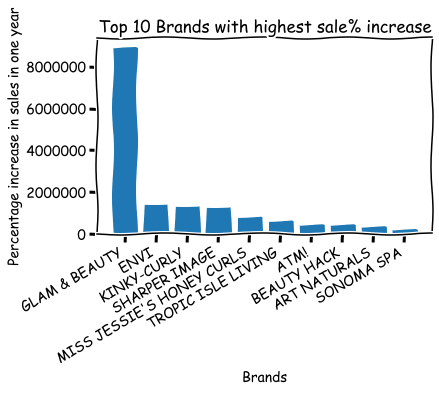

<Figure size 576x576 with 0 Axes>

In [32]:
plt.bar(np.array(percentage_brand_increase.head(10).index),np.array(percentage_brand_increase.head(10)))
plt.gcf().autofmt_xdate()
plt.xlabel("Brands")
plt.ylabel("Percentage increase in sales in one year")
plt.title("Top 10 Brands with highest sale% increase")
plt.xkcd()
plt.figure(figsize=[8,8])

# category wise Data Analysis
### Total sales in each category including all the brands - descending order 

In [33]:
currentyear_category_sales = data.groupby("category")["Total Sales"].sum().sort_values(ascending=False) 
currentyear_category_sales

category
Fragrances               2.518120e+11
Skincare                 1.050536e+11
Cosmetics                5.792872e+10
Skin Care                2.974027e+10
Hair Care                2.905964e+10
MAKEUP                   1.726516e+10
Apdeo                    1.465978e+10
Color Cosmetics          1.238592e+10
Hair Color               7.391551e+09
Beauty tools             2.316441e+09
Make up Removers         1.713359e+09
Cosmetic Applications    1.151018e+09
Hand/Arm Lotion          5.040531e+08
Nail Polish Remover      4.725984e+08
Nail Treatments          4.221229e+08
Foot Care                2.933375e+08
Multi Seg Product        4.852350e+05
Name: Total Sales, dtype: float64

<Figure size 576x576 with 0 Axes>

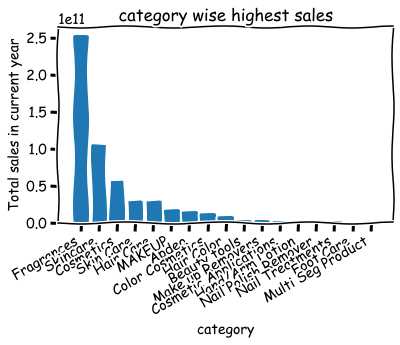

<Figure size 576x576 with 0 Axes>

In [34]:
plt.bar(np.array(currentyear_category_sales.index),np.array(currentyear_category_sales))
plt.gcf().autofmt_xdate()
plt.xlabel("category")
plt.ylabel("Total sales in current year")
plt.title("category wise highest sales")
plt.xkcd()
plt.figure(figsize=[8,8])

In [35]:
prevyear_category_sales = data.groupby("category")["PY Total Sales"].sum().sort_values(ascending=False) 
prevyear_category_sales

category
Fragrances               1.534014e+11
Skincare                 6.618835e+10
Cosmetics                3.686800e+10
Hair Care                1.889039e+10
Skin Care                1.760170e+10
Apdeo                    9.793653e+09
MAKEUP                   9.067728e+09
Color Cosmetics          8.377478e+09
Hair Color               5.074470e+09
Beauty tools             1.535149e+09
Make up Removers         1.148575e+09
Cosmetic Applications    7.736976e+08
Hand/Arm Lotion          3.320316e+08
Nail Polish Remover      3.208941e+08
Nail Treatments          2.751674e+08
Foot Care                1.922475e+08
Multi Seg Product        2.038870e+05
Name: PY Total Sales, dtype: float64

### Total sales percentage of increase for each category compared to previous year. 

In [36]:
percentage_increase = (((currentyear_category_sales-prevyear_category_sales)/prevyear_category_sales)*100).sort_values(ascending=False)
percentage_increase

category
Multi Seg Product        137.992123
MAKEUP                    90.402235
Skin Care                 68.962501
Fragrances                64.152309
Skincare                  58.719229
Cosmetics                 57.124646
Hair Care                 53.832925
Nail Treatments           53.405820
Foot Care                 52.583269
Hand/Arm Lotion           51.808775
Beauty tools              50.893585
Apdeo                     49.686516
Make up Removers          49.172551
Cosmetic Applications     48.768488
Color Cosmetics           47.847808
Nail Polish Remover       47.275513
Hair Color                45.661548
dtype: float64

<Figure size 576x576 with 0 Axes>

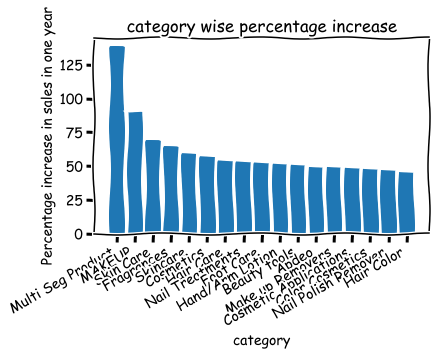

<Figure size 576x576 with 0 Axes>

In [37]:
plt.bar(np.array(percentage_increase.index),np.array(percentage_increase))
plt.gcf().autofmt_xdate()
plt.xlabel("category")
plt.ylabel("Percentage increase in sales in one year")
plt.title("category wise percentage increase")
plt.xkcd()
plt.figure(figsize=[8,8])

In [38]:
data = data.dropna()

# Insights data analysis

In [39]:
insights = pd.read_excel("Insights Monthly data - May 2019.xlsx");

In [40]:
insights.head(10)

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
0,Apdeo,NaN,CVS,$15777865.00,$20174261.00,$774689.00,$981549.00,0.0491,0.0487,0.0092
1,Apdeo,NaN,Rite Aid,$3151839.00,$4356774.00,$100914.00,$147155.00,0.0320,0.0338,-0.0521
2,Apdeo,NaN,Target,$27998392.00,$32712782.00,$378227.00,$514987.00,0.0135,0.0157,-0.1419
3,Apdeo,NaN,Walgreens,$12521469.00,$16394760.00,$541593.00,$728132.00,0.0433,0.0444,-0.0261
4,Apdeo,NaN,Walmart,$84055193.00,$106137926.00,$1510721.00,$2467179.00,0.0180,0.0232,-0.2268
5,Beauty tools,A/O KITS,CVS,$0.00,$0.00,$0.00,$0.00,NaN,NaN,NaN
6,Beauty tools,A/O KITS,Rite Aid,$160.00,$1136.00,$0.00,$0.00,0.0000,0.0000,NaN
7,Beauty tools,A/O KITS,Target,$283.00,$69.00,$283.00,$69.00,1.0000,1.0000,0.0000
8,Beauty tools,A/O KITS,Walgreens,$71944.00,$80983.00,$71917.00,$80598.00,0.9996,0.9952,0.0044
9,Beauty tools,A/O KITS,Walmart,$146315.00,$147533.00,$143023.00,$139398.00,0.9775,0.9449,0.0345


In [41]:
insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category                   425 non-null    object 
 1   segment                    395 non-null    object 
 2   retailer                   425 non-null    object 
 3   Total Sales                425 non-null    object 
 4   PY Total Sales             406 non-null    object 
 5   Revlon Total Sales         365 non-null    object 
 6   Revlon PY Sales            344 non-null    object 
 7   Revlon % Share             359 non-null    float64
 8   Revlon PY % Share          341 non-null    float64
 9   Revlon Share % difference  271 non-null    float64
dtypes: float64(3), object(7)
memory usage: 33.3+ KB


In [42]:
insights.shape

(425, 10)

In [43]:
insights.describe()

,Revlon % Share,Revlon PY % Share,Revlon Share % difference
count,359.000000,341.000000,271.000000
mean,0.235078,0.207926,217.113310
std,0.344223,0.305410,3568.414751
min,0.000000,0.000000,-1.000000
25%,0.000100,0.000200,-0.441550
50%,0.071800,0.076500,-0.018100
75%,0.287400,0.265200,0.056400
max,1.000000,1.000000,58743.813000


In [44]:
insights["category"].describe()

count                 425
unique                 14
top       Color Cosmetics
freq                  150
Name: category, dtype: object

In [45]:
insights["segment"].describe()

count          395
unique          92
top       Eye Kits
freq            10
Name: segment, dtype: object

In [46]:
insights["retailer"].describe()

count         425
unique          5
top       Walmart
freq           92
Name: retailer, dtype: object

In [47]:
insights["Total Sales"]=insights["Total Sales"].str.split("$").apply(lambda x:float(x[1]) if x[1][-1]!=")" else float(x[1].split(")")[0]))

In [48]:
insights.head(10)

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
0,Apdeo,NaN,CVS,15777865.0,$20174261.00,$774689.00,$981549.00,0.0491,0.0487,0.0092
1,Apdeo,NaN,Rite Aid,3151839.0,$4356774.00,$100914.00,$147155.00,0.0320,0.0338,-0.0521
2,Apdeo,NaN,Target,27998392.0,$32712782.00,$378227.00,$514987.00,0.0135,0.0157,-0.1419
3,Apdeo,NaN,Walgreens,12521469.0,$16394760.00,$541593.00,$728132.00,0.0433,0.0444,-0.0261
4,Apdeo,NaN,Walmart,84055193.0,$106137926.00,$1510721.00,$2467179.00,0.0180,0.0232,-0.2268
5,Beauty tools,A/O KITS,CVS,0.0,$0.00,$0.00,$0.00,NaN,NaN,NaN
6,Beauty tools,A/O KITS,Rite Aid,160.0,$1136.00,$0.00,$0.00,0.0000,0.0000,NaN
7,Beauty tools,A/O KITS,Target,283.0,$69.00,$283.00,$69.00,1.0000,1.0000,0.0000
8,Beauty tools,A/O KITS,Walgreens,71944.0,$80983.00,$71917.00,$80598.00,0.9996,0.9952,0.0044
9,Beauty tools,A/O KITS,Walmart,146315.0,$147533.00,$143023.00,$139398.00,0.9775,0.9449,0.0345


In [49]:
insights["PY Total Sales"].fillna("$0.00",inplace=True)

In [50]:
insights.tail(10)

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
415,Nail Treatments,REMAINING NAIL TREATMENTS,CVS,7.975029e+04,$69080.14,NaN,NaN,NaN,NaN,NaN
416,Nail Treatments,REMAINING NAIL TREATMENTS,Rite Aid,1.483126e+04,$15750.58,NaN,NaN,NaN,NaN,NaN
417,Nail Treatments,REMAINING NAIL TREATMENTS,Target,6.256022e+04,$50644.85,NaN,NaN,NaN,NaN,NaN
418,Nail Treatments,REMAINING NAIL TREATMENTS,Walgreens,5.621099e+04,$55656.49,$405.82,$6295.48,0.0072,0.1131,-0.9362
419,Nail Treatments,REMAINING NAIL TREATMENTS,Walmart,1.713648e+05,$184883.23,$7.50,$26.87,0.0000,0.0001,-0.6989
420,Skin Care,NaN,CVS,5.100000e+07,$45338973.22,$84385.17,$85817.78,0.0017,0.0019,-0.1258
421,Skin Care,NaN,Rite Aid,8.404833e+06,$8286171.61,$9180.74,$5740.41,0.0011,0.0007,0.5767
422,Skin Care,NaN,Target,6.495811e+07,$64349041.38,$26848.00,$30846.47,0.0004,0.0005,-0.1378
423,Skin Care,NaN,Walgreens,5.850749e+07,$52273715.61,$90374.92,$96811.52,0.0015,0.0019,-0.1659
424,Skin Care,NaN,Walmart,1.125698e+08,$112269218.48,$66204.97,$66191.12,0.0006,0.0006,-0.0025


In [51]:
insights["PY Total Sales"]=insights["PY Total Sales"].str.split("$").apply(lambda x:float(x[1]) if x[1][-1]!=")" else float(x[1].split(")")[0]))

In [52]:
insights

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
0,Apdeo,NaN,CVS,1.577786e+07,2.017426e+07,$774689.00,$981549.00,0.0491,0.0487,0.0092
1,Apdeo,NaN,Rite Aid,3.151839e+06,4.356774e+06,$100914.00,$147155.00,0.0320,0.0338,-0.0521
2,Apdeo,NaN,Target,2.799839e+07,3.271278e+07,$378227.00,$514987.00,0.0135,0.0157,-0.1419
3,Apdeo,NaN,Walgreens,1.252147e+07,1.639476e+07,$541593.00,$728132.00,0.0433,0.0444,-0.0261
4,Apdeo,NaN,Walmart,8.405519e+07,1.061379e+08,$1510721.00,$2467179.00,0.0180,0.0232,-0.2268
...,...,...,...,...,...,...,...,...,...,...
420,Skin Care,NaN,CVS,5.100000e+07,4.533897e+07,$84385.17,$85817.78,0.0017,0.0019,-0.1258
421,Skin Care,NaN,Rite Aid,8.404833e+06,8.286172e+06,$9180.74,$5740.41,0.0011,0.0007,0.5767
422,Skin Care,NaN,Target,6.495811e+07,6.434904e+07,$26848.00,$30846.47,0.0004,0.0005,-0.1378
423,Skin Care,NaN,Walgreens,5.850749e+07,5.227372e+07,$90374.92,$96811.52,0.0015,0.0019,-0.1659


In [53]:
insights[insights["Revlon Share % difference"].isna()]

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
5,Beauty tools,A/O KITS,CVS,0.00,0.00,$0.00,$0.00,NaN,NaN,NaN
6,Beauty tools,A/O KITS,Rite Aid,160.00,1136.00,$0.00,$0.00,0.0,0.0,NaN
15,Beauty tools,A/O PED,CVS,13.00,12.00,$0.00,$0.00,0.0,0.0,NaN
16,Beauty tools,A/O PED,Rite Aid,11722.00,11554.00,$0.00,$0.00,0.0,0.0,NaN
17,Beauty tools,A/O PED,Target,86.00,13878.00,$0.00,$0.00,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
411,Nail Treatments,NAIL STRENGTHENER,Rite Aid,144666.59,127187.62,NaN,NaN,NaN,NaN,NaN
412,Nail Treatments,NAIL STRENGTHENER,Target,541992.25,663017.97,NaN,NaN,NaN,NaN,NaN
415,Nail Treatments,REMAINING NAIL TREATMENTS,CVS,79750.29,69080.14,NaN,NaN,NaN,NaN,NaN
416,Nail Treatments,REMAINING NAIL TREATMENTS,Rite Aid,14831.26,15750.58,NaN,NaN,NaN,NaN,NaN


In [54]:
insights["Revlon Total Sales"].fillna("$0.00",inplace=True)

In [55]:
insights["Revlon PY Sales"].fillna("$0.00",inplace=True)

In [56]:
insights["Revlon % Share"].fillna("0.00",inplace=True)

In [57]:
insights["Revlon PY % Share"].fillna("0.00",inplace=True)

In [58]:
insights["Revlon Share % difference"].fillna("0.00",inplace=True)

In [59]:
insights

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
0,Apdeo,NaN,CVS,1.577786e+07,2.017426e+07,$774689.00,$981549.00,0.0491,0.0487,0.0092
1,Apdeo,NaN,Rite Aid,3.151839e+06,4.356774e+06,$100914.00,$147155.00,0.032,0.0338,-0.0521
2,Apdeo,NaN,Target,2.799839e+07,3.271278e+07,$378227.00,$514987.00,0.0135,0.0157,-0.1419
3,Apdeo,NaN,Walgreens,1.252147e+07,1.639476e+07,$541593.00,$728132.00,0.0433,0.0444,-0.0261
4,Apdeo,NaN,Walmart,8.405519e+07,1.061379e+08,$1510721.00,$2467179.00,0.018,0.0232,-0.2268
...,...,...,...,...,...,...,...,...,...,...
420,Skin Care,NaN,CVS,5.100000e+07,4.533897e+07,$84385.17,$85817.78,0.0017,0.0019,-0.1258
421,Skin Care,NaN,Rite Aid,8.404833e+06,8.286172e+06,$9180.74,$5740.41,0.0011,0.0007,0.5767
422,Skin Care,NaN,Target,6.495811e+07,6.434904e+07,$26848.00,$30846.47,0.0004,0.0005,-0.1378
423,Skin Care,NaN,Walgreens,5.850749e+07,5.227372e+07,$90374.92,$96811.52,0.0015,0.0019,-0.1659


In [60]:
insights["Revlon Total Sales"]=insights["Revlon Total Sales"].str.split("$").apply(lambda x:float(x[1]) if x[1][-1]!=")" else float(x[1].split(")")[0]))

In [61]:
insights["Revlon PY Sales"]=insights["Revlon PY Sales"].str.split("$").apply(lambda x:float(x[1]) if x[1][-1]!=")" else float(x[1].split(")")[0]))

In [62]:
insights

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
0,Apdeo,NaN,CVS,1.577786e+07,2.017426e+07,774689.00,981549.00,0.0491,0.0487,0.0092
1,Apdeo,NaN,Rite Aid,3.151839e+06,4.356774e+06,100914.00,147155.00,0.032,0.0338,-0.0521
2,Apdeo,NaN,Target,2.799839e+07,3.271278e+07,378227.00,514987.00,0.0135,0.0157,-0.1419
3,Apdeo,NaN,Walgreens,1.252147e+07,1.639476e+07,541593.00,728132.00,0.0433,0.0444,-0.0261
4,Apdeo,NaN,Walmart,8.405519e+07,1.061379e+08,1510721.00,2467179.00,0.018,0.0232,-0.2268
...,...,...,...,...,...,...,...,...,...,...
420,Skin Care,NaN,CVS,5.100000e+07,4.533897e+07,84385.17,85817.78,0.0017,0.0019,-0.1258
421,Skin Care,NaN,Rite Aid,8.404833e+06,8.286172e+06,9180.74,5740.41,0.0011,0.0007,0.5767
422,Skin Care,NaN,Target,6.495811e+07,6.434904e+07,26848.00,30846.47,0.0004,0.0005,-0.1378
423,Skin Care,NaN,Walgreens,5.850749e+07,5.227372e+07,90374.92,96811.52,0.0015,0.0019,-0.1659


In [63]:
insights["Revlon Total Sales"]=insights["Revlon Total Sales"].astype(float)

In [64]:
insights["Revlon Total Sales"]

0       774689.00
1       100914.00
2       378227.00
3       541593.00
4      1510721.00
          ...    
420      84385.17
421       9180.74
422      26848.00
423      90374.92
424      66204.97
Name: Revlon Total Sales, Length: 425, dtype: float64

In [65]:
insights["Revlon % Share"]=insights["Revlon % Share"].astype(float)

In [66]:
insights["Revlon PY % Share"]=insights["Revlon PY % Share"].astype(float)

In [67]:
insights["Revlon Share % difference"]=insights["Revlon Share % difference"].astype(float)

In [68]:
insights

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
0,Apdeo,NaN,CVS,1.577786e+07,2.017426e+07,774689.00,981549.00,0.0491,0.0487,0.0092
1,Apdeo,NaN,Rite Aid,3.151839e+06,4.356774e+06,100914.00,147155.00,0.0320,0.0338,-0.0521
2,Apdeo,NaN,Target,2.799839e+07,3.271278e+07,378227.00,514987.00,0.0135,0.0157,-0.1419
3,Apdeo,NaN,Walgreens,1.252147e+07,1.639476e+07,541593.00,728132.00,0.0433,0.0444,-0.0261
4,Apdeo,NaN,Walmart,8.405519e+07,1.061379e+08,1510721.00,2467179.00,0.0180,0.0232,-0.2268
...,...,...,...,...,...,...,...,...,...,...
420,Skin Care,NaN,CVS,5.100000e+07,4.533897e+07,84385.17,85817.78,0.0017,0.0019,-0.1258
421,Skin Care,NaN,Rite Aid,8.404833e+06,8.286172e+06,9180.74,5740.41,0.0011,0.0007,0.5767
422,Skin Care,NaN,Target,6.495811e+07,6.434904e+07,26848.00,30846.47,0.0004,0.0005,-0.1378
423,Skin Care,NaN,Walgreens,5.850749e+07,5.227372e+07,90374.92,96811.52,0.0015,0.0019,-0.1659


In [69]:
insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category                   425 non-null    object 
 1   segment                    395 non-null    object 
 2   retailer                   425 non-null    object 
 3   Total Sales                425 non-null    float64
 4   PY Total Sales             425 non-null    float64
 5   Revlon Total Sales         425 non-null    float64
 6   Revlon PY Sales            425 non-null    float64
 7   Revlon % Share             425 non-null    float64
 8   Revlon PY % Share          425 non-null    float64
 9   Revlon Share % difference  425 non-null    float64
dtypes: float64(7), object(3)
memory usage: 33.3+ KB


In [70]:
insights[insights["segment"].isna()]

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
0,Apdeo,NaN,CVS,1.577786e+07,2.017426e+07,774689.00,981549.00,0.0491,0.0487,0.0092
1,Apdeo,NaN,Rite Aid,3.151839e+06,4.356774e+06,100914.00,147155.00,0.0320,0.0338,-0.0521
2,Apdeo,NaN,Target,2.799839e+07,3.271278e+07,378227.00,514987.00,0.0135,0.0157,-0.1419
3,Apdeo,NaN,Walgreens,1.252147e+07,1.639476e+07,541593.00,728132.00,0.0433,0.0444,-0.0261
4,Apdeo,NaN,Walmart,8.405519e+07,1.061379e+08,1510721.00,2467179.00,0.0180,0.0232,-0.2268
225,Color Cosmetics,NaN,CVS,1.596000e+04,2.362200e+04,2.00,2.00,0.0001,0.0001,0.4801
226,Color Cosmetics,NaN,Rite Aid,6.600000e+01,3.270000e+02,35.00,87.00,0.5303,0.2661,0.9932
227,Color Cosmetics,NaN,Target,4.790800e+04,4.209400e+04,0.00,0.00,0.0000,0.0000,0.0000
228,Color Cosmetics,NaN,Walgreens,2.274500e+04,3.954400e+04,85.00,449.00,0.0037,0.0114,-0.6709
229,Color Cosmetics,NaN,Walmart,5.400000e+01,2.620000e+02,4.00,31.00,0.0741,0.1183,-0.3740


In [71]:
insights.dropna(inplace=True)

In [72]:
insights

,category,segment,retailer,Total Sales,PY Total Sales,Revlon Total Sales,Revlon PY Sales,Revlon % Share,Revlon PY % Share,Revlon Share % difference
5,Beauty tools,A/O KITS,CVS,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000
6,Beauty tools,A/O KITS,Rite Aid,160.00,1136.00,0.00,0.00,0.0000,0.0000,0.0000
7,Beauty tools,A/O KITS,Target,283.00,69.00,283.00,69.00,1.0000,1.0000,0.0000
8,Beauty tools,A/O KITS,Walgreens,71944.00,80983.00,71917.00,80598.00,0.9996,0.9952,0.0044
9,Beauty tools,A/O KITS,Walmart,146315.00,147533.00,143023.00,139398.00,0.9775,0.9449,0.0345
...,...,...,...,...,...,...,...,...,...,...
415,Nail Treatments,REMAINING NAIL TREATMENTS,CVS,79750.29,69080.14,0.00,0.00,0.0000,0.0000,0.0000
416,Nail Treatments,REMAINING NAIL TREATMENTS,Rite Aid,14831.26,15750.58,0.00,0.00,0.0000,0.0000,0.0000
417,Nail Treatments,REMAINING NAIL TREATMENTS,Target,62560.22,50644.85,0.00,0.00,0.0000,0.0000,0.0000
418,Nail Treatments,REMAINING NAIL TREATMENTS,Walgreens,56210.99,55656.49,405.82,6295.48,0.0072,0.1131,-0.9362


In [73]:
insights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 5 to 419
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category                   395 non-null    object 
 1   segment                    395 non-null    object 
 2   retailer                   395 non-null    object 
 3   Total Sales                395 non-null    float64
 4   PY Total Sales             395 non-null    float64
 5   Revlon Total Sales         395 non-null    float64
 6   Revlon PY Sales            395 non-null    float64
 7   Revlon % Share             395 non-null    float64
 8   Revlon PY % Share          395 non-null    float64
 9   Revlon Share % difference  395 non-null    float64
dtypes: float64(7), object(3)
memory usage: 33.9+ KB


In [74]:
cat_revlon_ts = insights.groupby("category")["Revlon Total Sales"].sum().sort_values(ascending=False)
cat_revlon_ts

category
Color Cosmetics          54835416.00
Hair Color                9601279.00
Beauty tools              5049273.00
Fragrances                4051566.00
Make up Removers          1781800.00
Nail Polish Remover        420421.04
Nail Treatments            131243.98
Cosmetic Applications       42018.18
Foot Care                      74.97
Multi Seg Product               0.00
Name: Revlon Total Sales, dtype: float64

<Figure size 1080x1080 with 0 Axes>

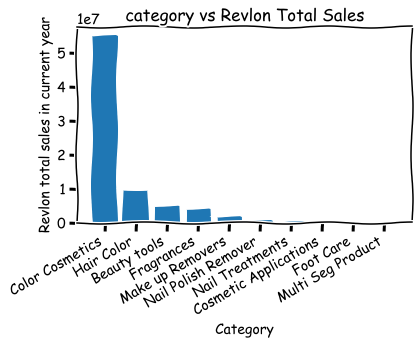

<Figure size 1080x1080 with 0 Axes>

In [75]:
plt.bar(np.array(cat_revlon_ts.index),np.array(cat_revlon_ts))
plt.gcf().autofmt_xdate()
plt.xlabel("Category")
plt.ylabel("Revlon total sales in current year")
plt.title("category vs Revlon Total Sales")
plt.xkcd()
plt.figure(figsize=[15,15])

In [76]:
cat_revlon_percent_share = insights.groupby("category")["Revlon % Share"].sum().sort_values(ascending=False)
cat_revlon_percent_share

category
Fragrances               42.0000
Beauty tools             16.2765
Color Cosmetics          15.9671
Make up Removers          1.8516
Nail Treatments           1.0734
Hair Color                0.7226
Nail Polish Remover       0.6125
Cosmetic Applications     0.0240
Foot Care                 0.0001
Multi Seg Product         0.0000
Name: Revlon % Share, dtype: float64

<Figure size 1080x1080 with 0 Axes>

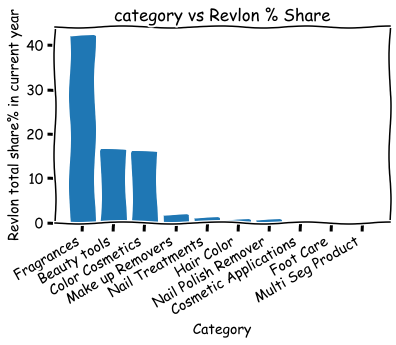

<Figure size 1080x1080 with 0 Axes>

In [77]:
plt.bar(np.array(cat_revlon_percent_share.index),np.array(cat_revlon_percent_share))
plt.gcf().autofmt_xdate()
plt.xlabel("Category")
plt.ylabel("Revlon total share% in current year")
plt.title("category vs Revlon % Share")
plt.xkcd()
plt.figure(figsize=[15,15])

In [78]:
insights.groupby("category")["Revlon PY % Share"].sum().sort_values(ascending=False)

category
Fragrances               26.0000
Beauty tools             18.0036
Color Cosmetics          16.7364
Make up Removers          1.8751
Nail Treatments           1.3179
Hair Color                0.6445
Nail Polish Remover       0.5624
Cosmetic Applications     0.0847
Foot Care                 0.0030
Multi Seg Product         0.0000
Name: Revlon PY % Share, dtype: float64

In [79]:
insights.groupby("category")["Revlon Share % difference"].sum().sort_values(ascending=False)

category
Hair Color               58744.0709
Nail Treatments             64.7293
Beauty tools                31.7835
Color Cosmetics              2.7858
Nail Polish Remover          0.2837
Multi Seg Product            0.0000
Fragrances                   0.0000
Make up Removers            -0.2906
Foot Care                   -0.9627
Cosmetic Applications       -3.3579
Name: Revlon Share % difference, dtype: float64

In [80]:
interpret1 = insights.groupby("category")["segment"].value_counts()

In [81]:
interpret1.loc["Color Cosmetics"]

segment
BBCC                     5
Blushes                  5
Body Makeup              5
Bronzers                 5
COMBO B/B/H              5
Colored Balms            5
Concealer                5
Eye Brow                 5
Eye Kits                 5
Eye Liner                5
Eye Shadow               5
Eye primers              5
FACE KITS                5
Face Powder              5
Foundations              5
Highlighters             5
KITS                     5
LIP KITS                 5
Lip Color                5
Lip Gel                  5
Lip Liners               5
Mascara                  5
Nail Enamel              5
Nail Gel                 5
PR                       5
Remaining Eye Makeup     5
Remaining Face Makeup    5
Remaining Lip Makeup     5
Setting Sprays           5
Name: segment, dtype: int64

In [82]:
insights.groupby("retailer")["Revlon Share % difference"].sum().sort_values(ascending=False)

retailer
Walmart      58732.5974
CVS             53.3716
Walgreens       44.3744
Rite Aid        13.6709
Target          -4.9723
Name: Revlon Share % difference, dtype: float64

In [83]:
revlon_ts = insights.groupby("retailer")["Revlon Total Sales"].sum().sort_values(ascending=False)
revlon_ts
## here we can see that comparitively revlon total sales is high at wallmart retailer.

retailer
Walmart      30006678.65
CVS          20447985.70
Walgreens    14619930.50
Target        7606106.44
Rite Aid      3232390.88
Name: Revlon Total Sales, dtype: float64

<Figure size 1080x1080 with 0 Axes>

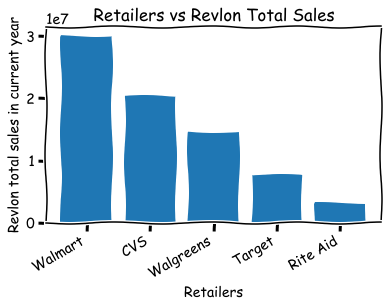

<Figure size 1080x1080 with 0 Axes>

In [84]:
plt.bar(np.array(revlon_ts.index),np.array(revlon_ts))
plt.gcf().autofmt_xdate()
plt.xlabel("Retailers")
plt.ylabel("Revlon total sales in current year")
plt.title("Retailers vs Revlon Total Sales")
plt.xkcd()
plt.figure(figsize=[15,15])

In [85]:
revlon_percent_share = insights.groupby("retailer")["Revlon % Share"].sum().sort_values(ascending=False)
revlon_percent_share
## here we can see that revlon share percentage is high at cvs retailer.

retailer
CVS          26.8121
Walgreens    23.4931
Walmart      18.1344
Rite Aid      5.5803
Target        4.5079
Name: Revlon % Share, dtype: float64

<Figure size 1080x1080 with 0 Axes>

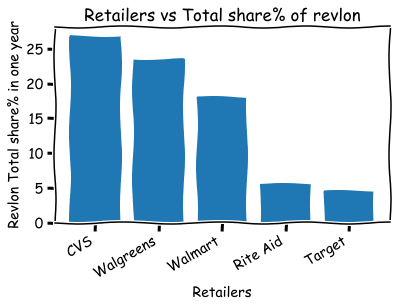

<Figure size 1080x1080 with 0 Axes>

In [86]:
plt.bar(np.array(revlon_percent_share.index),np.array(revlon_percent_share))
plt.gcf().autofmt_xdate()
plt.xlabel("Retailers")
plt.ylabel("Revlon Total share% in one year")
plt.title("Retailers vs Total share% of revlon")
plt.xkcd()
plt.figure(figsize=[15,15])

In [87]:
insights.groupby("retailer")["Revlon PY % Share"].sum().sort_values(ascending=False)

retailer
CVS          23.6276
Walgreens    21.6143
Walmart       8.1861
Rite Aid      7.7394
Target        4.0602
Name: Revlon PY % Share, dtype: float64